### Importing and structuring the data

This code is using the ML_cd73_data_intensity_classified dataset that Pegah sent me. Note that this is the correct dataset (according to her). It has 14500 cells.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/

Mounted at /content/drive
MyDrive


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Set random seed for reproducibility
np.random.seed(0)

#set my path
local_path = '/Users/pegaheizad/Desktop/Ghosh_lab/data_files_2'
# Load the data from an Excel file. The "sorted" file has fewer datapoints. Don't know the difference.
T1 = pd.read_excel(f'{local_path}/ML_data_intensity_classified.xlsx')
T1.shape


(3842, 96)

In [16]:
for index, column in enumerate(T1.columns):
    print(f" {index}: {column}")

 0: ImageNumber
 1: ObjectNumber
 2: Metadata_FileLocation
 3: Metadata_Frame
 4: Metadata_ImageNum
 5: Metadata_ImageNum.1
 6: Metadata_Series
 7: FileName_msc_image
 8: PathName_msc_image
 9: AreaShape_Area
 10: AreaShape_BoundingBoxArea
 11: AreaShape_BoundingBoxMaximum_X
 12: AreaShape_BoundingBoxMaximum_Y
 13: AreaShape_BoundingBoxMinimum_X
 14: AreaShape_BoundingBoxMinimum_Y
 15: AreaShape_Center_X
 16: AreaShape_Center_Y
 17: AreaShape_Compactness
 18: AreaShape_ConvexArea
 19: AreaShape_Eccentricity
 20: AreaShape_EquivalentDiameter
 21: AreaShape_EulerNumber
 22: AreaShape_Extent
 23: AreaShape_FormFactor
 24: AreaShape_MajorAxisLength
 25: AreaShape_MaxFeretDiameter
 26: AreaShape_MaximumRadius
 27: AreaShape_MeanRadius
 28: AreaShape_MedianRadius
 29: AreaShape_MinFeretDiameter
 30: AreaShape_MinorAxisLength
 31: AreaShape_Orientation
 32: AreaShape_Perimeter
 33: AreaShape_Solidity
 34: AreaShape_Zernike_0_0
 35: AreaShape_Zernike_1_1
 36: AreaShape_Zernike_2_0
 37: AreaSha

In [17]:
#Now clean up T1
# Metadata: Cols 0, 1, 3, 4, 5, 6, 7, 8, 9, 24, 72, 137-143
# Geometric: Cols 2, 10-23, 25-26; Zernike Moments: Cols 27-56
# Intensity: Cols 57-71; Radial Distribution: Cols 73-84
# Texture: Cols 85-136
# Exclude Metadata, keep others
# T2 = pd.concat([T1.iloc[:, 2], T1.iloc[:, 10:23], T1.iloc[:, 25:71], T1.iloc[:, 73:136]], axis=1)
T2 = pd.concat([T1.iloc[:, 9:63]], axis=1)
for index, column in enumerate(T2.columns):
    print(f" {index}: {column}")

 0: AreaShape_Area
 1: AreaShape_BoundingBoxArea
 2: AreaShape_BoundingBoxMaximum_X
 3: AreaShape_BoundingBoxMaximum_Y
 4: AreaShape_BoundingBoxMinimum_X
 5: AreaShape_BoundingBoxMinimum_Y
 6: AreaShape_Center_X
 7: AreaShape_Center_Y
 8: AreaShape_Compactness
 9: AreaShape_ConvexArea
 10: AreaShape_Eccentricity
 11: AreaShape_EquivalentDiameter
 12: AreaShape_EulerNumber
 13: AreaShape_Extent
 14: AreaShape_FormFactor
 15: AreaShape_MajorAxisLength
 16: AreaShape_MaxFeretDiameter
 17: AreaShape_MaximumRadius
 18: AreaShape_MeanRadius
 19: AreaShape_MedianRadius
 20: AreaShape_MinFeretDiameter
 21: AreaShape_MinorAxisLength
 22: AreaShape_Orientation
 23: AreaShape_Perimeter
 24: AreaShape_Solidity
 25: AreaShape_Zernike_0_0
 26: AreaShape_Zernike_1_1
 27: AreaShape_Zernike_2_0
 28: AreaShape_Zernike_2_2
 29: AreaShape_Zernike_3_1
 30: AreaShape_Zernike_3_3
 31: AreaShape_Zernike_4_0
 32: AreaShape_Zernike_4_2
 33: AreaShape_Zernike_4_4
 34: AreaShape_Zernike_5_1
 35: AreaShape_Zernike

In [18]:
#Sort dataframe by MeanIntensity_cells or col number 54 in ascending order
T2 = T2.sort_values(by=T2.columns[44])
print(T2.iloc[0:5, 44])
# Reset the index of the dataframe
T2 = T2.reset_index(drop=True)
print(T2.iloc[0:5, 44])
print(T2.shape)

779     0.000028
2059    0.000064
2134    0.000070
908     0.000100
1419    0.000137
Name: AreaShape_Zernike_7_7, dtype: float64
0    0.000028
1    0.000064
2    0.000070
3    0.000100
4    0.000137
Name: AreaShape_Zernike_7_7, dtype: float64
(3842, 54)


In [19]:

# Plot the mean Intensity of cd73

print(T2.columns[44])

plt.scatter(T2.index, T2['Intensity_MeanIntensity_cells'])
plt.xlabel('Index')
plt.ylabel('Value')

# Show the plot
plt.show()


# Now delete column 45:59 i.e. all the intensity measurements
#T2 = T2.drop(columns=T2.columns[45:60])
# Reset the index of the dataframe
#T2 = T2.reset_index(drop=True)
# Convert the table to a NumPy array
#T = T2.to_numpy()
#print(T.shape) #Should have 108 columns left
# Define the threshold value
#T = T2.to_numpy()
#print(T.shape)
#threshold = 150

# Select the first column (index 0) and apply the condition
#T_greater = arr[arr[:, 0] > threshold]  # Rows where the first column is greater than threshold
#less_equal_threshold = arr[arr[:, 0] <= threshold]  # Rows where the first column is less than or equal to threshold


AreaShape_Zernike_7_7


KeyError: 'Intensity_MeanIntensity_cells'

In [20]:
# Is the dataset already sorted? Check the first 5 rows of the original
print(T1.iloc[0:5, 65]) #In T1 the mean intensity is Col 65

0    4.474510
1    4.435294
2    5.596079
3    5.945098
4    4.886275
Name: Intensity_IntegratedIntensityEdge_cd73_img, dtype: float64


In [ ]:
# Divide dataset into two classes based on a threshold from the previous plot
#T = T2.to_numpy()
# Define the threshold value: this is kind of arbitrary
#threshold = 40

# Select the column (index 46) and apply the condition
#TG = T[T[:, 47] > threshold]  # Rows where the 47th column is greater than threshold
#TL = T[T[:, 47] <= threshold]  # Rows where the 47th column is less than or equal to threshold

# Display the results
#print(TG.shape)
#print(TL.shape)

In [22]:
T2.shape

(3842, 54)

### Setting the parameters for the ML

In [23]:
# Define the number of samples for each class
M = 1921
#N = 5000

T = T2.to_numpy()
# Create label vector: 1 for Class 1, 0 for Class 2
t = np.concatenate([np.zeros(M), np.ones(M)])

# Explanatory variables: Geometric 0:14, Zernike Moments cols 15:44 triple check indices
# Delete the middle 14500 - 2M from the data M+1:9501 i.e. till 14500-5000+1
X1 = np.delete(T, np.s_[M:3842], axis=0)
X2 = np.delete(T, np.s_[0:(3842-M)], axis=0)
# Shuffle the rows of the array
np.random.shuffle(X1)
np.random.shuffle(X2)
X = np.concatenate([X1, X2], axis=0)

# X = X[:, 9:63] #Geometric plus areashape_zerniake


# Ensure the dataset size matches the labels, optional check
assert X.shape[0] == len(t), 'Mismatch between data and label lengths.'

# Define the number of folds for cross-validation
kfold = 10
kf = KFold(n_splits=kfold, shuffle=True, random_state=0)

# Define the number of nodes in the hidden layer
#nNodes = 40

# Initialize confusion matrix and lists for predictions
totcon = np.zeros((2, 2))
totpred = np.array([])
totytest = np.array([])
models = []
acc = []


### Training the ML

In [26]:
# Train-test loop
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    xtrain, xtest = X[train_index], X[test_index]
    ytrain, ytest = t[train_index], t[test_index]

    # Convert labels to categorical (for binary classification)
    ytrain_cat = to_categorical(ytrain, 2)
    ytest_cat = to_categorical(ytest, 2)
    input_dim = xtrain.shape[1]  # Number of features in the input data
    # Build the neural network model
    model = Sequential()
    model.add(Dense(units=64, input_shape=(input_dim,), activation='relu'))
    # First hidden layer
    model.add(Dense(units=128, activation='relu'))

    # Second hidden layer
    #model.add(Dense(units=64, activation='relu'))

    # Output layer (for a binary classification example, you can use 'sigmoid')
    model.add(Dense(units=2, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
    model.summary()
    #Pegah's original
    #model.add(Dense(2, activation='softmax'))  # 2 output classes

    # Compile the model
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)               │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)               │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)               │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,098 (47.26 KB)

 Trainable params: 12,098 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model (90% train, 10% validation, no test ratio)
model.fit(xtrain, ytrain_cat, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Store the trained model
models.append(model)

    # Make predictions on the test set
pred = model.predict(xtest)
pred_labels = np.argmax(pred, axis=1)

    # Calculate confusion matrix
con = confusion_matrix(ytest, pred_labels)
totcon += con

    # Calculate accuracy for this fold
acc.append(accuracy_score(ytest, pred_labels) * 100)

    # Store predictions and true labels for confusion matrix plotting
totpred = np.concatenate([totpred, pred_labels])
totytest = np.concatenate([totytest, ytest])

# Print the average accuracy over all folds
print(f'Average accuracy over {kfold} folds: {np.mean(acc)}%')

# Optional: save the models and accuracy data
np.save(f'{local_path}/models.npy', models)
np.savetxt(f'{local_path}/accuracy.csv', acc, delimiter=',')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
Average accuracy over 10 folds: 61.588541666666664%


### Visualizing the confusion matrix

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


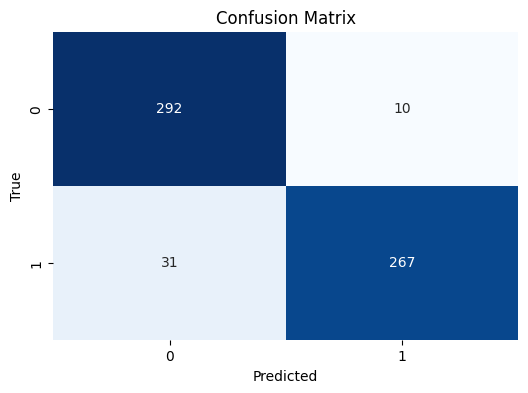

In [9]:


# After generating predictions from the model
y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(ytest, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [13]:
Z1 = np.concatenate([X1, X2], axis=0)
print(Z1.shape)
Z = Z1[:,44]
print(Z.shape)
print(Z[0:10])

(6000, 45)
(6000,)
[0.00206819 0.00182806 0.00251101 0.00260189 0.00186838 0.00184697
 0.00198223 0.00285341 0.00218946 0.00067268]


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
Average Mean Squared Error over 10 folds (scaled): 0.6256767178757742


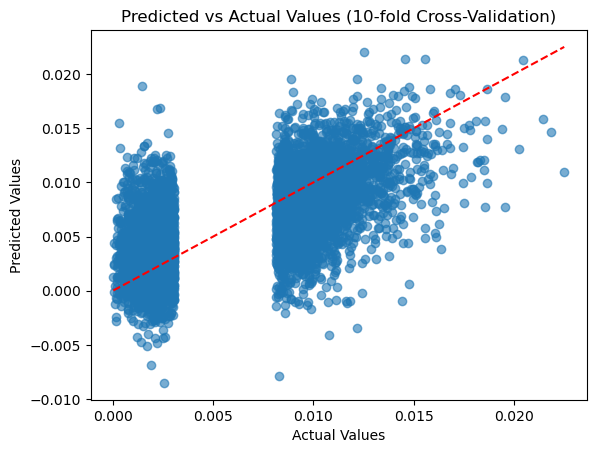

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
X = Z1[:, 0:44]
y = Z
# Define the KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Standardize the data (for X and y)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Define lists to store the results
predicted_values_scaled = []
actual_values_scaled = []
mse_list = []

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)))  # First hidden layer
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)  # Train model silently

    # Predict on the test set
    y_pred_scaled = model.predict(X_test)

    # Store predicted and actual values (in the scaled form)
    predicted_values_scaled.extend(y_pred_scaled.flatten())
    actual_values_scaled.extend(y_test)

    # Calculate the MSE for the fold and store it
    mse = mean_squared_error(y_test, y_pred_scaled)
    mse_list.append(mse)

# Calculate the average MSE over all folds
average_mse_scaled = np.mean(mse_list)
print(f"Average Mean Squared Error over 10 folds (scaled): {average_mse_scaled}")

# Inverse transform the predicted and actual values back to the original scale
predicted_values = scaler_y.inverse_transform(np.array(predicted_values_scaled).reshape(-1, 1)).flatten()
actual_values = scaler_y.inverse_transform(np.array(actual_values_scaled).reshape(-1, 1)).flatten()

# Plot predicted vs actual values (in the original scale)
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (10-fold Cross-Validation)')
plt.show()

Ok so regression analysis doesn't work. I'll check this once more, but this seems definite. Now I will try to histogram cd73 for soft and stiff separately.

In [10]:
T1.iloc[4000,139]

'soft'

In [7]:
# Divide the DataFrame into two based on whether column 139 contains 'TCP'
T1_with_tcp = T1[T1['Metadata_GrowingSurface'].str.contains('TCP')]
T1_without_tcp = T1[~T1['Metadata_GrowingSurface'].str.contains('TCP')]
print(T1_with_tcp.shape)
print(T1_without_tcp.shape)

(5447, 144)
(9053, 144)


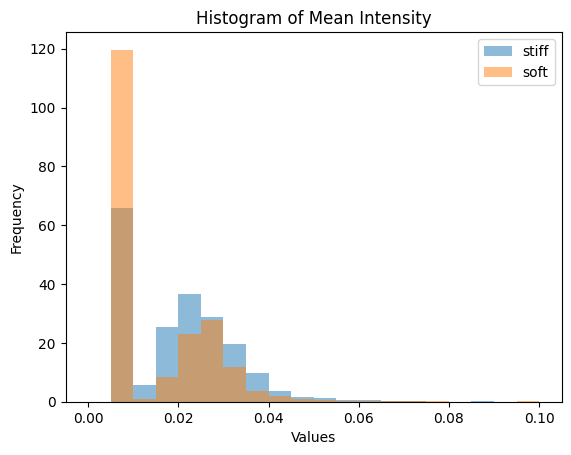

In [30]:
# Plot a histogram of 'Column1'
T1_with_tcp['Intensity_MeanIntensity_cells'].plot.hist(bins=20, range = (0,0.1), alpha=0.5,density='True', label = 'stiff')
#overlay a second histogram
T1_without_tcp['Intensity_MeanIntensity_cells'].plot.hist(bins=20, range = (0,0.1), alpha=0.5, density='True', label = 'soft')
# Display the plot
# Add legend
plt.legend()

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Intensity')
plt.savefig(f'{local_path}histogram_cd73.svg', format='svg')
plt.show()

In [31]:
# Calculate the mean of 'Intensity_MeanIntensity_cells'
mean_value1 = T1_with_tcp['Intensity_MeanIntensity_cells'].mean()
mean_value2 = T1_without_tcp['Intensity_MeanIntensity_cells'].mean()
# Print the result
print(f"The mean with TCP is: {mean_value1} and without TCP is {mean_value2}")

The mean with TCP is: 0.021189868020056568 and without TCP is 0.015062452227701875


In [41]:
#just to check
xindex = 1000
print("Should be TCP: ", T1_with_tcp.iloc[xindex,139])
print("Should be soft: ", T1_without_tcp.iloc[xindex,139])

Should be TCP:  TCP
Should be soft:  soft


In [13]:

# Specify the column you want to correlate with others using its index
column_of_interest_index = 65  # This corresponds to column 'A'

# Specify the range of columns you want to correlate with
start_column = 100
end_column = 120  # This is exclusive, so it will use columns 10 to 49

# Calculate correlations
correlations = T1.iloc[:, start_column:end_column].corrwith(T1.iloc[:, column_of_interest_index])

print(correlations)

Texture_DifferenceEntropy_cells_3_03_256          0.740325
Texture_DifferenceVariance_cells_3_00_256        -0.606855
Texture_DifferenceVariance_cells_3_01_256        -0.606647
Texture_DifferenceVariance_cells_3_02_256        -0.606874
Texture_DifferenceVariance_cells_3_03_256        -0.606642
Texture_Entropy_cells_3_00_256                    0.691523
Texture_Entropy_cells_3_01_256                    0.692742
Texture_Entropy_cells_3_02_256                    0.691784
Texture_Entropy_cells_3_03_256                    0.692968
Texture_InfoMeas1_cells_3_00_256                 -0.781002
Texture_InfoMeas1_cells_3_01_256                 -0.760090
Texture_InfoMeas1_cells_3_02_256                 -0.763158
Texture_InfoMeas1_cells_3_03_256                 -0.765811
Texture_InfoMeas2_cells_3_00_256                  0.709101
Texture_InfoMeas2_cells_3_01_256                  0.706406
Texture_InfoMeas2_cells_3_02_256                  0.705750
Texture_InfoMeas2_cells_3_03_256                  0.7086